In [1]:
##
#The simple example for Net1 of DREAM4 in silico Network Challenge by CIC
from utils import plot_score_matrix
import torch
from CIC import CIC
import os
import numpy as np
from Compare import main_methods,compare_methods
import matplotlib.pyplot as plt
from utils import GRN_Dream4_data,plot_score_matrix,Confounder,confound_CCA
import seaborn as sns

In [16]:
xy_dim=12
z_dim=6
hid_dim=128

GRN_Net, GRN_data=GRN_Dream4_data(n_nold = 10, Net_num=10)
##For Net1 (For the other 9 gene regulatory networks, we can adjust GRN_data[f"Net{i}"] to get the result.)
data=GRN_data[f"Net{0}"]      
Net_ground,Net_confd= Confounder(GRN_Net[f"Net{0}"])
weights = torch.tensor([0.35, 0.35, 0.120, 0.09,0.22,0.001,0.001])
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
out_s, causal_index, Net_causal=CIC(data,weights,xy_dim,z_dim,hid_dim,embedding_dim=xy_dim,time_delay=1,T=3,num_epochs=200,device=device)

Epoch 00175: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00194: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00161: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00181: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00197: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00153: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00178: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00190: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00164: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00199: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00165: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00193: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00178: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00193: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00194: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00200: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00

method GC complete!
method TE complete!
method CCM complete!
method PCM complete!
method CME complete!
method DCME complete!
method CMC complete!
method DCMC complete!


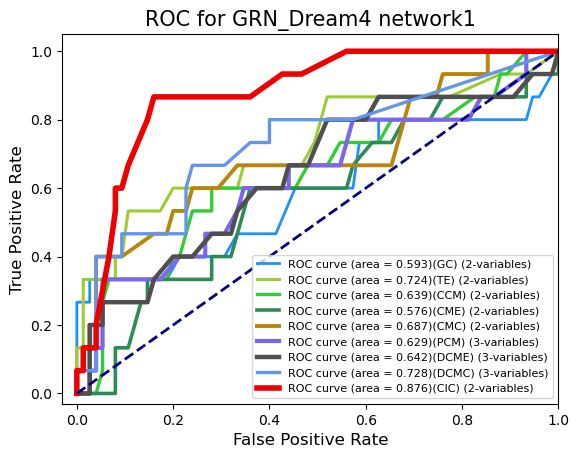

In [71]:
res_dir = f'/.../GRN_Dream4/Net2/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

Net1=torch.where(Net_causal == 2, 0, Net_causal)
Net_ground1=torch.where(Net_ground == 2, 0, Net_ground)
method_Net_scores=main_methods(data,res_dir,embed_dim=xy_dim,n_neighbor=3,n_excluded = 0)
TP, FP, TN, FN, FPR, TPR, Precision0, Precision1, Recall0, Recall1, Accuracy,  roc_auc,methods,CauNet_diff8,Causal_diff8,thrs=compare_methods(res_dir,Net_ground1,causal_index, Net1,num=75)

plt.figure()
plt.plot(FPR[f"X{1}"], TPR[f"X{1}"], color='#1E90FF', lw=2, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[1], methods[1]))
plt.plot(FPR[f"X{2}"], TPR[f"X{2}"], color='#9ACD32', lw=2.2, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[2], methods[2]))
plt.plot(FPR[f"X{3}"], TPR[f"X{3}"], color='#32CD32', lw=2.4, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[3], methods[3]))
plt.plot(FPR[f"X{4}"], TPR[f"X{4}"], color='#2E8B57', lw=2.6, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[4], methods[4]))
plt.plot(FPR[f"X{5}"], TPR[f"X{5}"], color='#B8860B', lw=2.8, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[5], methods[5]))
plt.plot(FPR[f"X{6}"], TPR[f"X{6}"], color='#7A67EE', lw=3, label='ROC curve (area = %0.3f)(%0.4s) (3-variables)' % (roc_auc[6], methods[6]))
plt.plot(FPR[f"X{7}"], TPR[f"X{7}"], color='#4F4F4F', lw=3.2, label='ROC curve (area = %0.3f)(%0.4s) (3-variables)' % (roc_auc[7], methods[7]))
plt.plot(FPR[f"X{8}"], TPR[f"X{8}"], color='#6495ED', lw=2.4, label='ROC curve (area = %0.3f)(%0.6s) (3-variables)' % (roc_auc[8], methods[8]))
plt.plot(FPR[f"X{0}"], TPR[f"X{0}"], color='#EE0000', lw=4, label='ROC curve (area = %0.3f)(%0.4s) (2-variables)' % (roc_auc[0], methods[0]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([-0.03, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC for GRN_Dream4 network1', fontsize=15)
plt.legend(loc="lower right", fontsize=8)
plt.show()

/home/disk1/yanjinling/anaconda2023/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/disk1/yanjinling/anaconda2023/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/disk1/yanjinling/anaconda2023/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/disk1/yanjinling/anaconda2023/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/disk1/yanjinling/anaconda2023/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warni

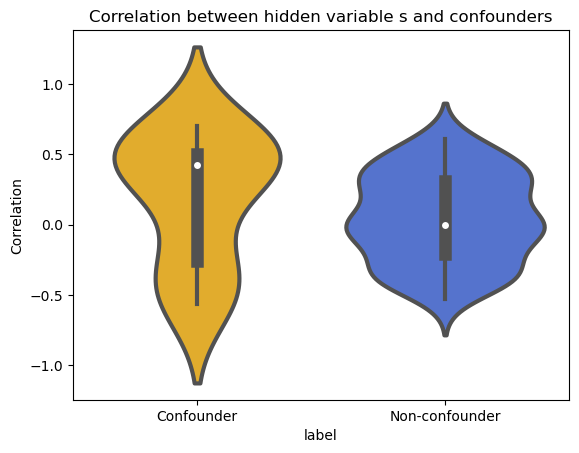

In [66]:
#Confounder quantification by CCA
Net_ground0=torch.where(Net_ground == 2, 0, Net_ground)
B = []
for i in range(Net_ground0.size(0)):
    diagonal_sum = torch.sum(Net_ground0[i, :]) + torch.sum(Net_ground0[:, i]) - 2 * Net_ground0[i, i]
    B.append(diagonal_sum.item())
Z0 = np.argmin(np.array(B)) 
CCA,CCA_list=confound_CCA(data,Net_ground,Net_confd,out_s,Z0=Z0)
plt.figure()
custom_palette = ["#FFB90F", "#4169E1"] 
sns.violinplot(x='label', y='CCA', data=CCA_list, inner="box", linewidth=3, palette=custom_palette)
plt.title('Correlation between hidden variable s and confounders')
#plt.xlabel('')
plt.ylabel('Correlation')
plt.show()

Text(0.5, 1.0, 'Ground truth network1')

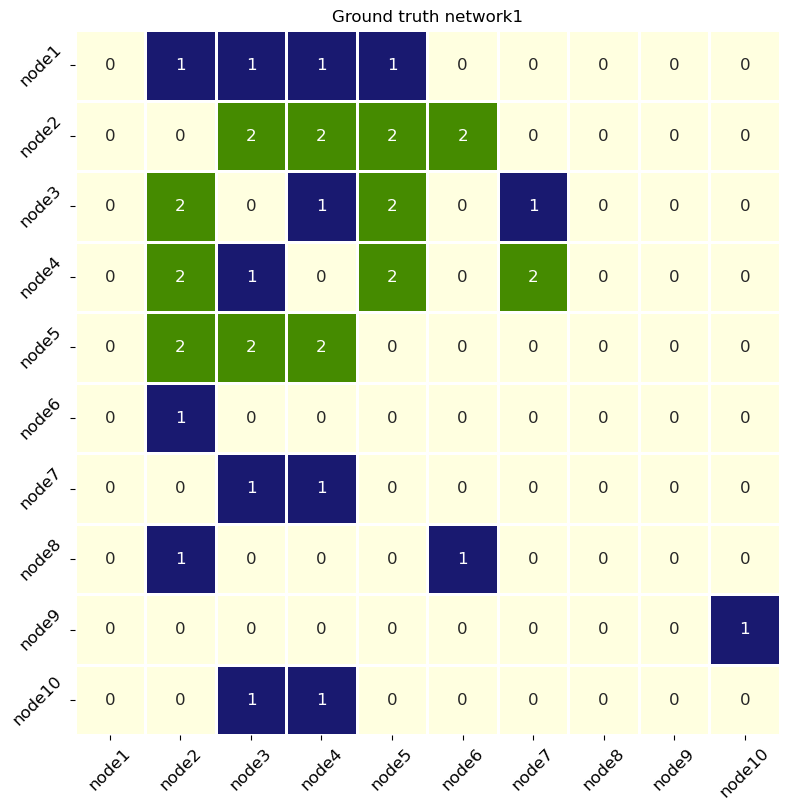

In [69]:
##plotting ground truth matrix
labels = ['node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9', 'node10']
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = plot_score_matrix(Net_ground, cbar=False, labels=labels, fontsize=12, fmt='.0f', linewidths=2, ticklabel_rotation=45, cmap=sns.color_palette(["#FFFFE0", "#191970", "#458B00"]), annot=True, ax=ax)
plt.title('Ground truth network1')